<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/Pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2023 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.


# cp_sat_example

<table align="left">
<td>
<a href="https://colab.research.google.com/github/google/or-tools/blob/main/examples/notebook/sat/cp_sat_example.ipynb"><img src="https://raw.githubusercontent.com/google/or-tools/main/tools/colab_32px.png"/>Run in Google Colab</a>
</td>
<td>
<a href="https://github.com/google/or-tools/blob/main/ortools/sat/samples/cp_sat_example.py"><img src="https://raw.githubusercontent.com/google/or-tools/main/tools/github_32px.png"/>View source on GitHub</a>
</td>
</table>

# Developed by Alireza Soroudi
Email: alireza.soroudi@ gmail  

Linkedin new letter :
https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git : https://github.com/OptimizationExpert/Pyomo

In [20]:
import random
from google.colab import files


First, you must install [ortools](https://pypi.org/project/ortools/) package in this colab.

In [21]:
Ng = 20
Nc = 50
elements = {e for e in range(Ng)}
customers = range(Nc)
data = {}
for c in customers:

  n = random.randint(0,4)
  data[c,'L'] = set(random.sample(elements, n))

  n = random.randint(0,4)
  data[c,'D'] = set(random.sample(elements-data[c,'L'], n) )

data

<ipython-input-21-e7c9a57e7211>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  data[c,'L'] = set(random.sample(elements, n))
<ipython-input-21-e7c9a57e7211>:12: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  data[c,'D'] = set(random.sample(elements-data[c,'L'], n) )


{(0, 'L'): {2, 4, 6, 11},
 (0, 'D'): {0},
 (1, 'L'): {1, 16},
 (1, 'D'): set(),
 (2, 'L'): {3, 5, 6, 10},
 (2, 'D'): {15, 16, 19},
 (3, 'L'): {6, 11, 15},
 (3, 'D'): set(),
 (4, 'L'): {5, 9, 12, 17},
 (4, 'D'): {0, 7},
 (5, 'L'): {1, 2, 5, 11},
 (5, 'D'): {8, 10, 13, 19},
 (6, 'L'): set(),
 (6, 'D'): {12},
 (7, 'L'): {1, 19},
 (7, 'D'): {6, 12, 13},
 (8, 'L'): set(),
 (8, 'D'): {6, 8, 17, 18},
 (9, 'L'): {0, 18},
 (9, 'D'): {7},
 (10, 'L'): {2, 4, 18},
 (10, 'D'): set(),
 (11, 'L'): {16},
 (11, 'D'): {14, 18},
 (12, 'L'): {0, 1, 3, 6},
 (12, 'D'): set(),
 (13, 'L'): {11, 18},
 (13, 'D'): {0, 7, 10},
 (14, 'L'): set(),
 (14, 'D'): {0, 14, 15, 16},
 (15, 'L'): {4},
 (15, 'D'): {13, 19},
 (16, 'L'): {7, 9, 17, 19},
 (16, 'D'): {3, 11, 14, 18},
 (17, 'L'): {7, 12, 14},
 (17, 'D'): {5, 11, 13, 17},
 (18, 'L'): {4},
 (18, 'D'): {0, 1, 17, 19},
 (19, 'L'): set(),
 (19, 'D'): {1, 12, 17},
 (20, 'L'): {7, 13, 15, 16},
 (20, 'D'): {0, 3, 17, 18},
 (21, 'L'): {12, 16},
 (21, 'D'): {5, 6, 14},
 (2

In [22]:
%pip install ortools
from ortools.sat.python import cp_model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

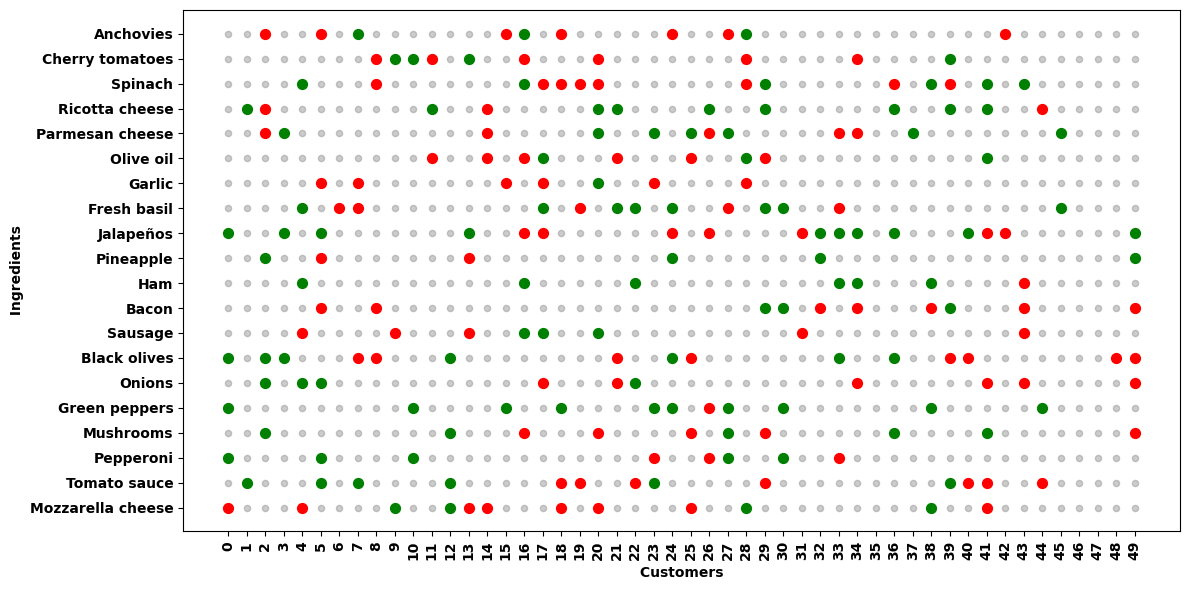

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

pizza_ingredients = [
    'Mozzarella cheese',
    'Tomato sauce',
    'Pepperoni',
    'Mushrooms',
    'Green peppers',
    'Onions',
    'Black olives',
    'Sausage',
    'Bacon',
    'Ham',
    'Pineapple',
    'Jalapeños',
    'Fresh basil',
    'Garlic',
    'Olive oil',
    'Parmesan cheese',
    'Ricotta cheese',
    'Spinach',
    'Cherry tomatoes',
    'Anchovies'
]


plt.figure(figsize=(12,6))
for c in customers:
  X= [c for e in elements]
  Y= [e for e in elements]
  plt.scatter(X,Y, c='grey', s=20, alpha=0.4)


  x= [c for e in data[c,'L'] ]
  y= [e for e in data[c,'L'] ]
  plt.scatter(x,y, c='g', s=50)
  x= [c for e in data[c,'D'] ]
  y= [e for e in data[c,'D'] ]
  plt.scatter(x,y, c='r', s=50)

plt.xticks(list(customers),rotation=90, fontweight='bold')
plt.yticks(list(elements), pizza_ingredients, fontweight='bold')

plt.ylabel(' Ingredients ', fontweight='bold')
plt.xlabel(' Customers ', fontweight='bold')
plt.tight_layout()

fname = 'base_pizza.png'
plt.savefig(fname)

# Download the file
files.download(fname)
plt.show()




Simple solve.

Maximum of objective function: 15.0



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

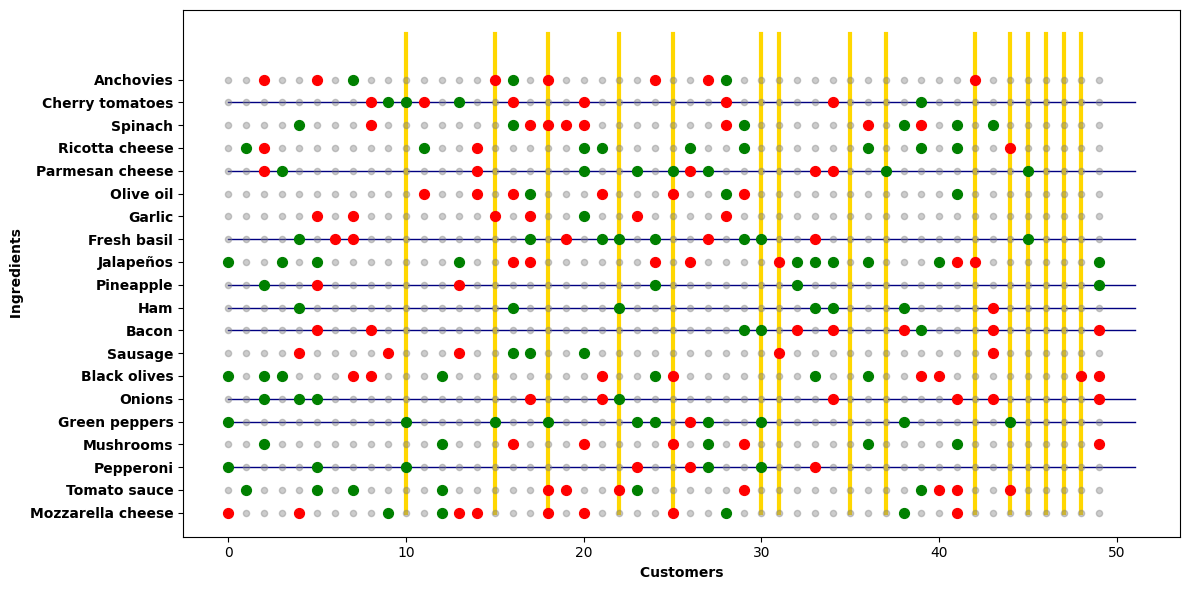

In [24]:
def main():
    """Minimal CP-SAT example to showcase calling the solver."""
    # Creates the model.
    #elements
    #customers
    model = cp_model.CpModel()
    # Creates the variables.
    X = {e:model.NewBoolVar(f"x_{e}") for e in elements}
    Sc = {c:model.NewBoolVar(f"S_{c}") for c in customers}

    for c,v in Sc.items():
      for e in data[c,'L']:
        model.Add(v<= X[e])
      for e in data[c,'D']:
        model.Add(v<= 1-X[e])

    expressions = [v for s,v in Sc.items() ]
    model.Maximize( cp_model.LinearExpr.Sum(expressions))

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = 60
    status = solver.Solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print(f"Maximum of objective function: {solver.ObjectiveValue()}\n")
    else:
        print("No solution found.")

    selected_e = [e for e,v in X.items() if solver.Value(v)>0]
    selected_c = []
    plt.figure(figsize=(12,6))
    for c in customers:
      if solver.Value(Sc[c])>0:
        selected_c.append(c)
      X= [c for e in elements]
      Y= [e for e in elements]
      plt.scatter(X,Y, c='grey', s=20, alpha=0.4)


      x= [c for e in data[c,'L'] ]
      y= [e for e in data[c,'L'] ]
      plt.scatter(x,y, c='g', s=50)
      x= [c for e in data[c,'D'] ]
      y= [e for e in data[c,'D'] ]
      plt.scatter(x,y, c='r', s=50)

    #plt.xticks(list(customers),rotation=90, fontweight='bold')
    plt.yticks(list(elements), pizza_ingredients, fontweight='bold')


    for e in selected_e:
      plt.plot([0,Nc+1],[e,e],c='navy', lw=1, zorder=-2)
    for c in selected_c:
      plt.plot([c,c], [0,Ng+1], c='gold',lw=3, zorder=-2)

    plt.ylabel(' Ingredients ', fontweight='bold')
    plt.xlabel(' Customers ', fontweight='bold')
    plt.tight_layout()




    fname = 'crook_pizza.png'
    plt.savefig(fname)

    # Download the file
    files.download(fname)
    plt.show()



main()

